In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy
import glob

In [2]:
counts_df = scanpy.read_h5ad('../processed_data/counts.h5ad').to_df()
counts_df.head()

index,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Gad2,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.659448,0.0,...,0.261892,0.262109,0.037601,0.010633,0.192950,0.079685,0.063194,0.613834,0.038716,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.512115,0.225832,0.093828,0.000000,0.160687,0.171461,0.208027,0.618113,0.051407,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.0,0.0,0.000000,0.0,...,0.199059,0.114653,0.000000,0.070231,0.144294,0.051351,0.148232,0.448829,0.041903,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.240500,0.093413,0.033100,0.151837,0.197471,0.011399,0.110675,1.117577,0.016462,0.467554
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.0,0.0,0.983257,0.0,...,1.726676,0.533404,3.691514,0.000000,0.296567,0.748264,1.423427,11.386119,0.387408,0.000000


In [3]:
spots_df = pd.read_csv('../processed_data/all_passing_rna_spots.csv')
spots_df.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2
1,-4183.0010,1688.5905,0.0,Acta2,1,281878279612082858224382179441472205807,mouse1sample2
2,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
3,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
4,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2


In [4]:
spots_df['cell_id'].unique().size

237949

In [5]:
counts_df.shape

(280327, 254)

In [8]:
counts_df['sample'].value_counts()

KeyError: 'sample'

In [7]:
shared_cell_ids = np.intersect1d(counts_df.index, spots_df['cell_id'])
print(shared_cell_ids.size)

237949


In [3]:
data = {
    'fname':[],
    'total_cells':[],
    'cells_kept':[],
    'total_spots':[],
    'unassigned_spots':[],
    'mean_spots_per_kept_cell':[],
    'std_spots_per_kept_cell':[],
    'mean_genes_per_kept_cell':[],
    'std_genes_per_kept_cell':[],
}

for i,f_path in enumerate(glob.glob('*.all')):
    print(f_path)
    spot_assigns = pd.read_csv(f_path)
    
    shared_cells = np.intersect1d(
        spot_assigns.dropna()['cell_id'].unique(),
        counts_df.index,
        assume_unique=True,
    )
    
    kept_cells = spot_assigns[spot_assigns['cell_id'].isin(shared_cells)]

    data['fname'].append(f_path)
    data['total_cells'].append(spot_assigns['cell_id'].unique().size)
    data['cells_kept'].append(shared_cells.size)
    data['total_spots'].append(spot_assigns.shape[0])
    data['unassigned_spots'].append(spot_assigns['cell_id'].isnull().sum())
    data['mean_spots_per_kept_cell'].append(kept_cells.groupby('cell_id').size().mean())
    data['std_spots_per_kept_cell'].append(kept_cells.groupby('cell_id').size().std())
    data['mean_genes_per_kept_cell'].append(kept_cells.groupby('cell_id')['target_molecule_name'].unique().apply(len).mean())
    data['std_genes_per_kept_cell'].append(kept_cells.groupby('cell_id')['target_molecule_name'].unique().apply(len).std())
    
    
summary_df = pd.DataFrame(data)
summary_df.T
    

mouse1sample2.combined.all
mouse2sample2.combined.all
mouse2sample1.combined.all
mouse1sample1.combined.all
mouse1sample5.combined.all
mouse2sample3.combined.all
mouse1sample4.combined.all
mouse2sample5.combined.all


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


mouse2sample4.combined.all
mouse1sample6.combined.all
mouse1sample3.combined.all


,0,1,2,3,4,5,6,7,8,9,10
fname,mouse1sample2.combined.all,mouse2sample2.combined.all,mouse2sample1.combined.all,mouse1sample1.combined.all,mouse1sample5.combined.all,mouse2sample3.combined.all,mouse1sample4.combined.all,mouse2sample5.combined.all,mouse2sample4.combined.all,mouse1sample6.combined.all,mouse1sample3.combined.all
total_cells,38201,29896,18260,26053,43304,26038,45661,11745,26180,34404,33305
cells_kept,27353,21655,13517,17976,31046,18424,32962,8154,19322,24423,23117
total_spots,33890996,22908097,15054616,17130008,32266241,12929648,35639400,20831047,21620600,17800847,26087141
unassigned_spots,20336683,12304733,8097272,10407456,17782781,6801248,20598384,19281856,11835713,9114595,16942460
mean_spots_per_kept_cell,374.438,362.232,395.134,265.543,348.907,235.559,337.653,134.868,380.593,256.667,285.556
std_spots_per_kept_cell,331.153,325.148,344.275,231.16,295.173,211.98,286.902,150.745,340.937,222.973,256.429
mean_genes_per_kept_cell,68.0883,61.0568,67.639,58.3145,65.1141,50.1803,66.3399,43.2911,64.1908,55.2483,60.277
std_genes_per_kept_cell,36.5842,31.7856,34.8416,31.6881,33.4612,27.8054,34.9964,27.9696,33.8502,30.0144,34.0996


In [4]:
summary_df['fname'] = summary_df['fname'].str.split('.').str[0]
summary_df.T

,0,1,2,3,4,5,6,7,8,9,10
fname,mouse1sample2,mouse2sample2,mouse2sample1,mouse1sample1,mouse1sample5,mouse2sample3,mouse1sample4,mouse2sample5,mouse2sample4,mouse1sample6,mouse1sample3
total_cells,38201,29896,18260,26053,43304,26038,45661,11745,26180,34404,33305
cells_kept,27353,21655,13517,17976,31046,18424,32962,8154,19322,24423,23117
total_spots,33890996,22908097,15054616,17130008,32266241,12929648,35639400,20831047,21620600,17800847,26087141
unassigned_spots,20336683,12304733,8097272,10407456,17782781,6801248,20598384,19281856,11835713,9114595,16942460
mean_spots_per_kept_cell,374.438,362.232,395.134,265.543,348.907,235.559,337.653,134.868,380.593,256.667,285.556
std_spots_per_kept_cell,331.153,325.148,344.275,231.16,295.173,211.98,286.902,150.745,340.937,222.973,256.429
mean_genes_per_kept_cell,68.0883,61.0568,67.639,58.3145,65.1141,50.1803,66.3399,43.2911,64.1908,55.2483,60.277
std_genes_per_kept_cell,36.5842,31.7856,34.8416,31.6881,33.4612,27.8054,34.9964,27.9696,33.8502,30.0144,34.0996


In [5]:
summary_df.to_csv('summary_spot_assignmnets.csv',index=False)

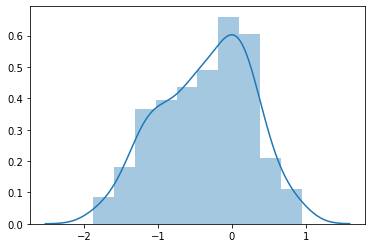

In [57]:
def calculate_supp_fig1(df):
    num_cells = df['cell_id'].unique().size
    vals = df.groupby('target_molecule_name').size()/num_cells
    vals = np.log10(vals)
    return vals
    
vals = calculate_supp_fig1(kept_cells)
sns.distplot(vals)
plt.show()
plt.close()

target_molecule_name
1700022I11Rik       870
1810046K07Rik      2081
5031425F14Rik       746
5730522E02Rik      1891
Acta2             17046
                  ...  
Vtn               30907
Vwc2               4291
Wipf3            210018
Wnt7b             24311
Zfp804b            6460
Length: 252, dtype: int64

In [53]:
kept_cells

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id
0,-5873.8620,-3202.30540,0.0,1810046K07Rik,1,291620345127113703537714290799504304023
4,-5771.1290,-3187.91110,0.0,5730522E02Rik,1,287806061234176497450362164091796264185
13,-5905.6900,-3198.91580,0.0,Acta2,1,243637678144572956601440070706073916102
20,-5778.5960,-3150.52100,0.0,Acta2,1,180879604530770654786346071857420260943
32,-5794.3794,-3294.15380,0.0,Adamts4,1,2872634874492976282584273954155390845
...,...,...,...,...,...,...
17800837,5713.4526,908.15780,1.5,Unc5d,1,332235063672675999016974566107808936247
17800840,5601.8096,726.05255,1.5,Ust,1,271987945384704506950016494023117289031
17800841,5689.2460,731.42130,1.5,Ust,1,307054690332620548202683053324737196242
17800842,5704.1807,748.22327,1.5,Ust,1,327052799777062487573604934001082418036


In [ ]:
comb_df = pd.DataFrame()

for i,f_path in enumerate(glob.glob('*.all')):
    print(f_path)
    spot_assigns = pd.read_csv(f_path)
    spot_assigns['sample'] = f_path.split('.')[0]
    comb_df = pd.concat((comb_df, spot_assigns))
    
display(comb_df.shape)


comb_df.to_csv('all_rna_spots.csv',index=False)

comb_df = comb_df.dropna()
comb_df = comb_df[comb_df['cell_id'].isin(counts_df.index)]
display(comb_df.shape)

display(comb_df.head())

comb_df.to_csv('all_passing_rna_spots.csv',index=False)

mouse1sample2.combined.all
mouse2sample2.combined.all
mouse2sample1.combined.all
mouse1sample1.combined.all
mouse1sample5.combined.all
mouse2sample3.combined.all


In [63]:
comb_df['num_assigned_cells'].max()

2

In [64]:
comb_df['num_assigned_cells'].eq(2).sum()

767

In [65]:
comb_df.shape

(65583688, 7)